In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_1 = np.array([0,1])
cov_1 = np.array([[1, 0], [0, 1]])

dist_1 = np.random.multivariate_normal(mean_1, cov_1, 1000)
dist_1[:, 1].mean()

1.0154347608806804

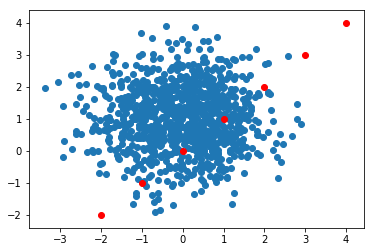

In [3]:
plt.figure()
plt.scatter(dist_1[:,0], dist_1[:,1])
plt.scatter([-2,-1,0,1,2,3,4], [-2,-1,0,1,2,3,4], color='red')
plt.show()

In [4]:
# Generating Dataset

mean_01 = np.array([0,0])
cov_01 = np.array([[3.2,0.6], [0.6,3]])

mean_02 = np.array([5,6])
cov_02 = np.array([[4.3, 0.8], [0.8, 3.2]])

mean_03 = np.array([8,-2])
cov_03 = np.array([[10, -0.3], [-0.3, 0.7]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)
dist_03 = np.random.multivariate_normal(mean_03, cov_03, 500)
print(dist_01.shape, dist_02.shape, dist_03.shape)

(500, 2) (500, 2) (500, 2)


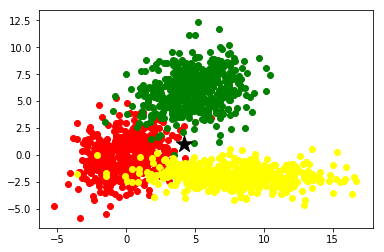

In [5]:
plt.figure()
plt.scatter(dist_01[:,0], dist_01[:,1], color='red')
plt.scatter(dist_02[:,0], dist_02[:,1], color='green')
plt.scatter(dist_03[:,0], dist_03[:,1], color='yellow')
plt.scatter(4.2, 1, marker='*', color='black', s=300)
plt.show()

In [6]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [7]:
rows = dist_01.shape[0] + dist_02.shape[0] + dist_03.shape[0]
cols = dist_01.shape[1] + 1
data = np.zeros((rows, cols))

In [8]:
data[:dist_01.shape[0], :-1] = dist_01
data[dist_01.shape[0]:dist_02.shape[0]+dist_03.shape[0], :-1] = dist_02
data[dist_02.shape[0]+dist_03.shape[0]:, :-1] = dist_03

# Labels
data[:dist_01.shape[0], -1] = 0
data[dist_01.shape[0]:dist_02.shape[0]+dist_03.shape[0], -1] = 1
data[dist_02.shape[0]+dist_03.shape[0]:, -1] = 2

np.random.shuffle(data)

In [9]:
# Training & Testing Dataset

factor = 0.80
split = int(data.shape[0] * factor)

X_train = data[:split, :-1]
X_test = data[split:, :-1]

y_train = data[:split, -1]
y_test = data[split:, -1]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1200, 2) (300, 2) (1200,) (300,)


In [10]:
# K Nearest Neighbors
def knn(X_train, y_train, test_point, k=5):
    distances = []
    
#     for data_point, label in zip(X_train, y_train):
    for i in range(X_train.shape[0]):
        data_point = X_train[i]
        label = y_train[i]
        distance = euclidean(test_point, data_point)
        distances.append((distance, label))
        
    distances = np.array(sorted(distances, key=lambda x: x[0]))
    k_neighbors = distances[:k][:, 1]
    
    freq = np.unique(k_neighbors, return_counts=True)
    labels, count = freq
    max_index = count.argmax()
    ans = labels[max_index]
    return ans
    
    

In [11]:
knn(X_train, y_train, np.array([4.2,1]), k=11)

0.0

In [12]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    predictions = []
    
    for i in range(X_test.shape[0]):
        predictions.append(knn(X_train, y_train, X_test[i], k))
    
    predictions = np.array(predictions)
    
    acc = (predictions==y_test).sum()/y_test.shape[0]
    return acc

In [13]:
calculate_accuracy(X_test, y_test, X_train, y_train)

0.9633333333333334

# MNIST

In [14]:
import pandas as pd

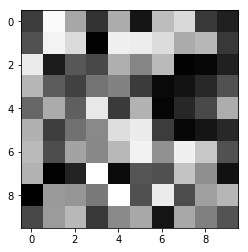

In [15]:
a = np.random.random((10,10))
plt.imshow(a, cmap='gray')

In [16]:
dataset = pd.read_csv('../datasets/mnist_data/train.csv')

In [17]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dataset['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [19]:
data = dataset.values
data = data[:5000]

In [20]:
split = int(data.shape[0] * 0.85)
X_train, X_test, y_train, y_test = data[:split, 1:], data[split:, 1:], data[:split, 0], data[split:, 0]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4250, 784) (750, 784) (4250,) (750,)


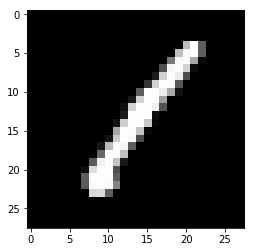

In [21]:
digit = X_train[0]
im = digit.reshape((28,28))
plt.imshow(im, cmap='gray')

In [22]:
calculate_accuracy(X_test, y_test, X_train, y_train)

0.936

In [23]:
test_ds = pd.read_csv('../datasets/mnist_data/test.csv')

In [24]:
test_ds.shape

(28000, 784)

In [25]:
test_points = test_ds.values[:20]

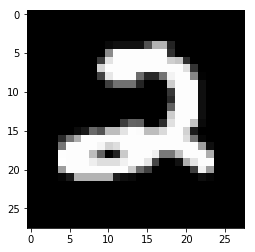

Label: 2.0



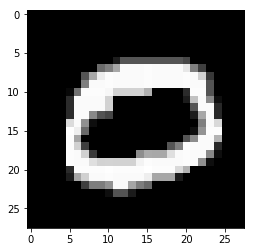

Label: 0.0



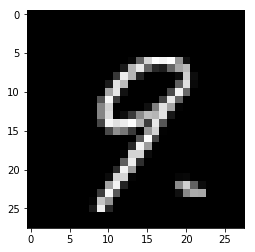

Label: 9.0



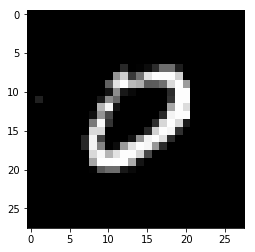

Label: 9.0



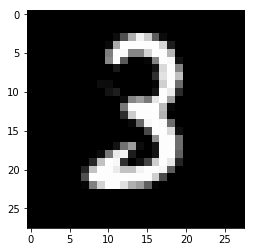

Label: 3.0



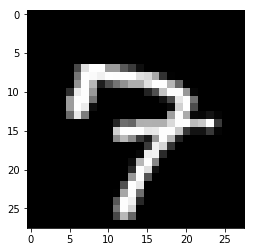

Label: 7.0



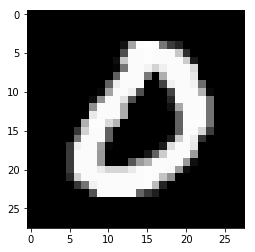

Label: 0.0



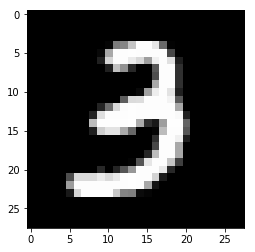

Label: 3.0



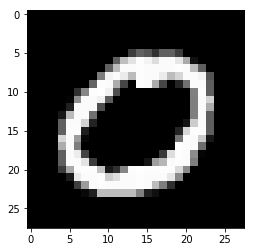

Label: 0.0



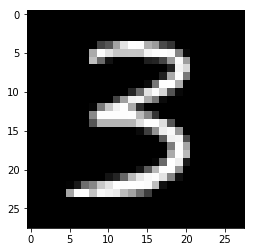

Label: 3.0



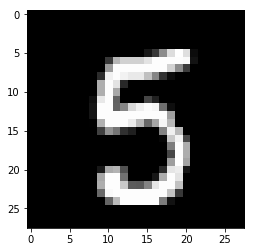

Label: 5.0



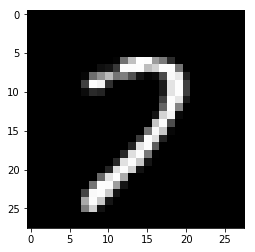

Label: 7.0



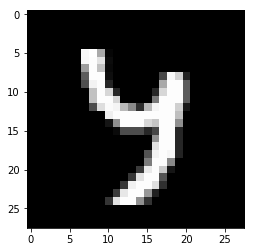

Label: 4.0



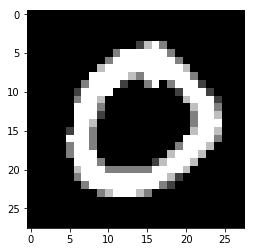

Label: 0.0



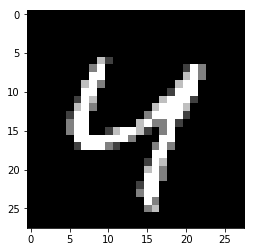

Label: 4.0



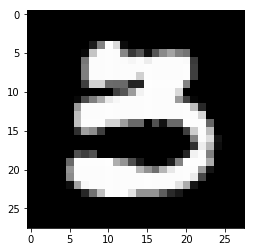

Label: 3.0



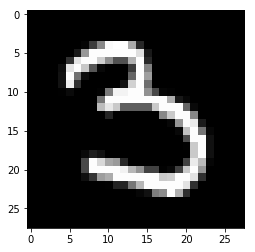

Label: 3.0



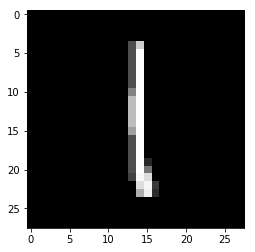

Label: 1.0



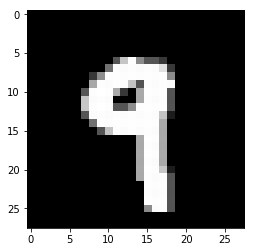

Label: 9.0



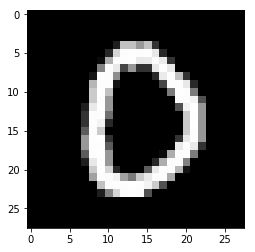

Label: 0.0



In [26]:
for each in test_points:
    plt.figure()
    im = each.reshape((28,28))
    plt.imshow(im, cmap='gray')
    plt.show()
    print("Label:", knn(X_train, y_train, each))
    input()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')

In [29]:
knn.score(X_test, y_test)
# (knn.predict(X_test) == y_test).sum()
# 702/750

0.9213333333333333